首先使用import引入tqdm和time包

In [2]:
from tqdm import tqdm
import time
print("import done.")

import done.


假设我们正在进行一些耗时的操作，比如训练深度学习模型

In [3]:
for i in tqdm(range(100)):
    time.sleep(0.01)

100%|██████████| 100/100 [00:01<00:00, 96.53it/s]


In [9]:
for x in range(10):
    print(x)

while x < 20:
    x += 1
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


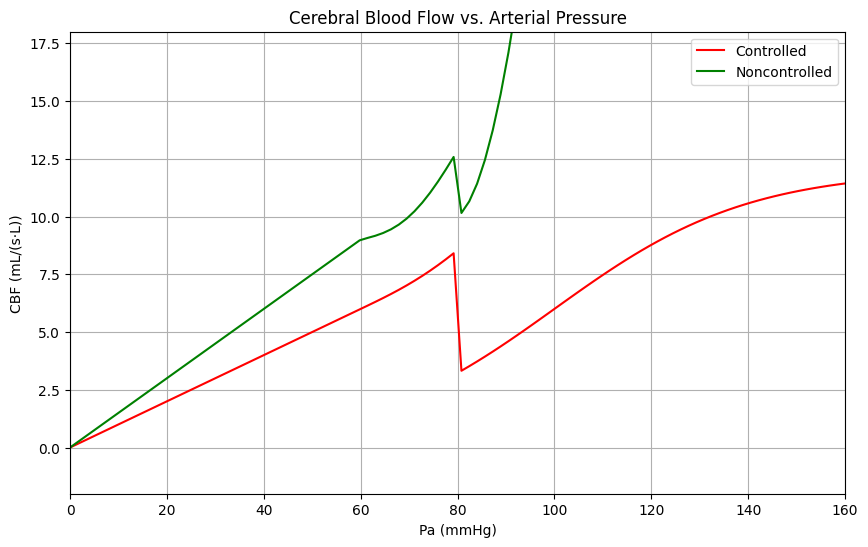

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define x-axis values (Pa in mmHg)
Pa = np.linspace(0, 160, 100)  # 100 points from 0 to 160

# Define y-axis values (CBF in mL/(s·L)) for Controlled and Noncontrolled
# Controlled curve: Sigmoid with a plateau and slight dip around 60-80 mmHg
Controlled_CBF = np.where(Pa < 60, 0.1 * Pa,  # Linear rise initially
                         np.where(Pa < 80, 6 + 0.15 * (Pa - 60) - 0.5 * np.sin((Pa - 60) * 0.1),  # Dip/oscillation
                                  12 / (1 + np.exp(-0.05 * (Pa - 100)))))  # Plateau after 80 mmHg

# Noncontrolled curve: Steeper rise with oscillation around 60-80 mmHg, then sharp rise
Noncontrolled_CBF = np.where(Pa < 60, 0.15 * Pa,  # Steeper initial rise
                            np.where(Pa < 80, 9 + 0.2 * (Pa - 60) - 1.0 * np.sin((Pa - 60) * 0.15),  # Larger dip/oscillation
                                     10 + 0.15 * (Pa - 80) + 0.05 * (Pa - 80)**2))  # Sharp rise after 80 mmHg, peaking >16

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(Pa, Controlled_CBF, 'r-', label='Controlled')  # Red line for Controlled
plt.plot(Pa, Noncontrolled_CBF, 'g-', label='Noncontrolled')  # Green line for Noncontrolled

# Customize the plot
plt.xlabel('Pa (mmHg)')
plt.ylabel('CBF (mL/(s·L))')
plt.title('Cerebral Blood Flow vs. Arterial Pressure')
plt.grid(True)
plt.legend()

# Set axis limits to match the image
plt.ylim(-2, 18)
plt.xlim(0, 160)

# Display the plot
plt.show()